# FAI HW 01: FBA Agent

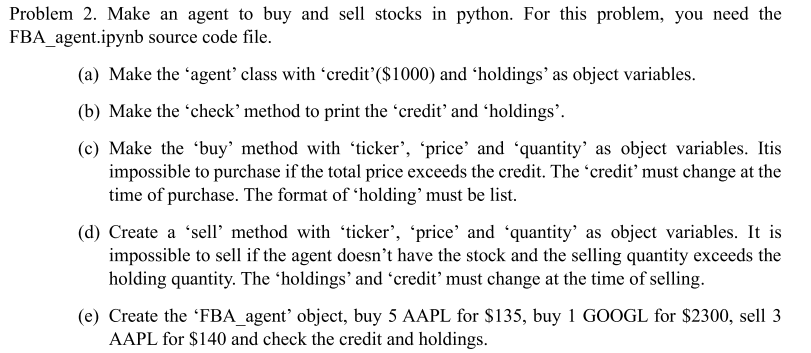

In [49]:
class Agent:
    def __init__(self, holdings=[], credit=1000) -> None:
        self.holdings = holdings
        self.credit = credit

        print('The agent is created')
    
    def check(self):
        print(f'''
credit : {self.credit}
holdings : {self.holdings}
        ''')

        return
    
    def buy(self, li):
        ticker, price, quantity = li

        if self.credit < price * quantity:
            print('Not enough credit')

            return
        else:
            self.credit -= price * quantity
            self.holdings.append(li)
            print(f'The agent buys {quantity} shares of {ticker} at {price}')

            return
    
    def sell(self, li):
        ticker, price, quantity = li

        ticker_holdings = [h for h in self.holdings if h[0] == ticker]
        ticker_quantity_sum = sum([h[2] for h in ticker_holdings])

        if ticker_quantity_sum < quantity:
            print('Not enough quantity')

            return
        else:
            sold_from_inventory = 0
            while sold_from_inventory < quantity:
                holding = ticker_holdings.pop(0)
                _, inventory_price, inventory_quantity = holding
                self.holdings.remove(holding)

                if inventory_quantity <= quantity - sold_from_inventory:
                    sold_from_inventory += inventory_quantity
                    self.credit += price * inventory_quantity
                else:
                    self.credit += price * (quantity - sold_from_inventory)
                    self.holdings.insert(0, [ticker, inventory_price, inventory_quantity - (quantity - sold_from_inventory)])

                    break
            
            print(f'The agent sells {quantity} shares of {ticker} at {price}')

            return

In [39]:
FBA_agent = Agent()

The agent is created


In [40]:
FBA_agent.buy(['AAPL', 135, 5])

The agent buys 5 shares of AAPL at 135


In [41]:
FBA_agent.check()


credit : 325
holdings : [['AAPL', 135, 5]]
        


In [42]:
FBA_agent.buy(['GOOG', 2300, 1])

Not enough credit


In [43]:
FBA_agent.sell(['AAPL', 140, 3])

The agent sells 3 shares of AAPL at 140


In [44]:
FBA_agent.check()


credit : 745
holdings : [['AAPL', 135, 2]]
        


In [45]:
# 추가 테스트

FBA_agent.buy(['AAPL', 140, 3])

The agent buys 3 shares of AAPL at 140


In [46]:
# 추가 테스트

FBA_agent.buy(['AAPL', 150, 2])

The agent buys 2 shares of AAPL at 150


In [47]:
FBA_agent.check()


credit : 25
holdings : [['AAPL', 135, 2], ['AAPL', 140, 3], ['AAPL', 150, 2]]
        


In [48]:
FBA_agent.sell(['AAPL', 150, 6])

The agent sells 6 shares of AAPL at 150


In [36]:
FBA_agent.check()


credit : 925
holdings : [['AAPL', 140, 3], ['AAPL', 150, 2]]
        


- 추가로 해볼만한 것 
    - 내역, 현황 나눠서 저장하기
    - MTS처럼 실현 수익률 계산하기

